In [70]:
#importer des packages

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importation du dataset


In [71]:

##chemin du dossier des données sur les ventes
path = r"E:\FourthYear\BigData\vente_electronique\Sales_Data"

##dataset
folder = [file for file in os.listdir(path)]

for file in folder:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [72]:
##regroupment de toutes les données de vente

all_sales = pd.DataFrame()

for file in folder:
    sale_month = pd.read_csv(path + "\\" + file)
    all_sales = pd.concat([all_sales, sale_month])

#PS si vous êtes sur MAC_OS, remplacez "\\" par "/"

In [4]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
##types de données des variables
all_sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [6]:
##dimension du dataset
all_sales.shape

(186850, 6)

### Nettoyage du dataset

In [7]:

##Traitement des valeurs manquantes.
all_sales.isnull().sum()   #on compte les NA dans chaque colonne

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Vu que le nombre de NA est négligeable(545*6 = 3270) par rapport à notre dataset(186850) alors, les lignes comportant les NA vont être supprimer du dataset.

In [73]:
##suppression les lignes où toutes les valeurs sont des NA

all_sales = all_sales.dropna(how='all')
all_sales.shape

(186305, 6)

In [9]:
#Nombre de lignes en double dans le dataset

all_sales.duplicated().sum()

618

In [10]:
#Extraction des lignes doubles

all_sales[all_sales.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11574,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11618,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


Je remarque que le datasets présente des valeurs aberrantes

In [75]:
# Valeurs aberrantes
all_sales[all_sales['Order ID'] == "Order ID"]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [76]:
## on récupérer puis supprime les indexes des lignes qui 
#ont des valeurs anormales

all_sales = all_sales.drop(all_sales.loc[all_sales['Order ID'] == "Order ID"].index)

In [13]:
all_sales[all_sales['Order ID'] == "Order ID"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [14]:
all_sales.duplicated().value_counts()

False    182476
True        259
dtype: int64

In [77]:
#Suppression des lignes doublées
all_sales = all_sales.drop_duplicates()

In [16]:
all_sales.duplicated().value_counts()

False    182476
dtype: int64

J'ai supprimé toutes les lignes en double dans le dataset

In [17]:
all_sales.shape

(182476, 6)

In [18]:
all_sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [78]:

##Conversion des variables au bon format

#Quantity Ordered to INT
all_sales['Quantity Ordered'] = all_sales['Quantity Ordered'].astype('int')

#Price Each to FLOAT
all_sales['Price Each'] = all_sales['Price Each'].astype('float')

# Order Date to Datetime
all_sales['Order Date'] = pd.to_datetime(all_sales['Order Date'])

In [20]:
all_sales.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

### Analyses des données :  Réponses aux questions


##### Quel est le meilleur mois de vente ? et Quel est le chiffre d'affaires de ce mois ?


In [79]:
#Extraction du mois dans le dataset

all_sales["Month"] = all_sales['Order Date'].dt.month_name()

In [18]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April


In [80]:
#Colonne représentant du prix d'achat

all_sales['Purchase Price'] = all_sales['Quantity Ordered'] * all_sales['Price Each']

In [112]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Purchase Price
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99


In [23]:
#La somme des ventes par mois avec la fonction GroupBy

all_sales.groupby('Month')["Purchase Price"].sum().sort_values(ascending = False)

Month
December     4552757.78
October      3677305.14
April        3334936.11
November     3148056.94
May          3099893.51
March        2753842.37
July         2586130.47
June         2522942.88
August       2190028.75
February     2156333.14
September    2047266.82
January      1785667.72
Name: Purchase Price, dtype: float64

Text(0.5, 1.0, "Répresentation du chiffre d'affaire par mois")

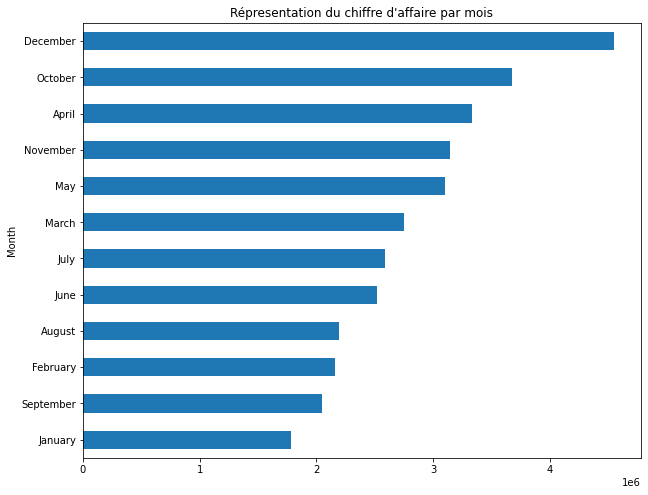

In [22]:
all_sales.groupby('Month')["Purchase Price"].sum().sort_values().plot.barh(figsize = (10, 8))
plt.title("Répresentation du chiffre d'affaire par mois")

    Le meilleur mois de vente est décembre avec un chiffre d'affaire de 4552757.78 
    .Cela est dû au fait que le mois de décembre est très attractive au cours de laquelle on achète des cadeaux pour Noël et pour le nouvel an

#### Dans quelle ville a-t-on le plus vendu de produits ?

In [81]:
def get_city(address):
    return address.split(',')[1].strip()

In [82]:
#créer une colonne ville à l'aide des informations présentes
#dans la colonne Purchase Address

all_sales["City"] = all_sales["Purchase Address"].apply(get_city)

In [26]:
all_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Purchase Price,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,8.97,Los Angeles
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,700.00,San Francisco
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,700.00,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,379.99,San Francisco


In [26]:
#La ville dont on a le plus vendu des produits 
all_sales.groupby('City')["Quantity Ordered"].sum().sort_values(ascending = False)

City
San Francisco    49295
Los Angeles      32681
New York City    27442
Boston           22089
Dallas           16430
Atlanta          16286
Seattle          16262
Portland         13791
Austin           10917
Name: Quantity Ordered, dtype: int32

In [83]:
city = all_sales['City'].unique()
city

array(['Dallas', 'Boston', 'Los Angeles', 'San Francisco', 'Seattle',
       'Atlanta', 'New York City', 'Portland', 'Austin'], dtype=object)

Text(0.5, 1.0, 'Répresentation du nombre de produit vendu par ville')

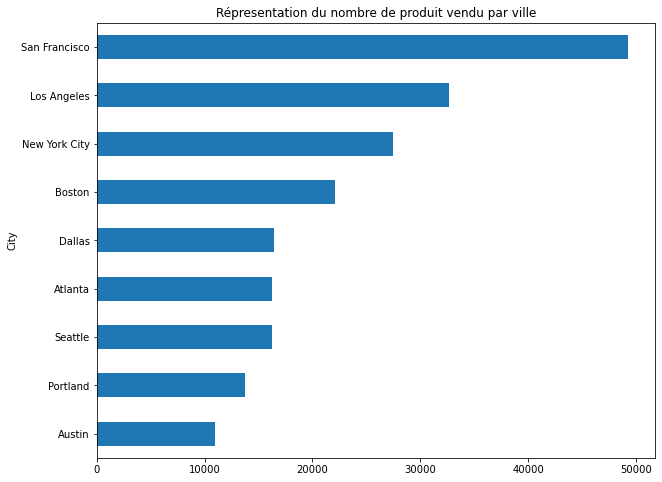

In [28]:
all_sales.groupby('City')["Quantity Ordered"].sum().sort_values().plot.barh(figsize = (10, 8))
plt.title("Répresentation du nombre de produit vendu par ville")

La ville dont le nombre de produit est le plus vendu est **San Francisco**

 #### A quelle heure devons-nous passer de la publicité pour augmenter nos ventes ?

In [84]:
#Récupérer l'heure dans la colonne Order Date

all_sales['Order Date'].dt.hour.unique()

array([ 8, 22, 14,  9, 13,  7, 10, 17, 12, 19, 15, 20, 18,  0, 11, 23, 21,
        4, 16,  5,  2,  1,  6,  3], dtype=int64)

In [85]:
# Créer une colonne heure
all_sales["Hour"] = all_sales['Order Date'].dt.hour

In [32]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Purchase Price,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles,9


In [30]:
all_sales.groupby('Hour')["Quantity Ordered"].sum().sort_values(ascending = False)

Hour
19    14210
12    13933
11    13745
18    13559
20    13555
13    13423
14    12144
10    12042
21    12015
17    12002
16    11394
15    11159
22     9700
9      9620
23     6942
8      6913
7      4474
0      4347
6      2766
1      2576
5      1462
2      1378
4       923
3       911
Name: Quantity Ordered, dtype: int32

Text(0.5, 1.0, 'Répresentation du nombre de vente par heure')

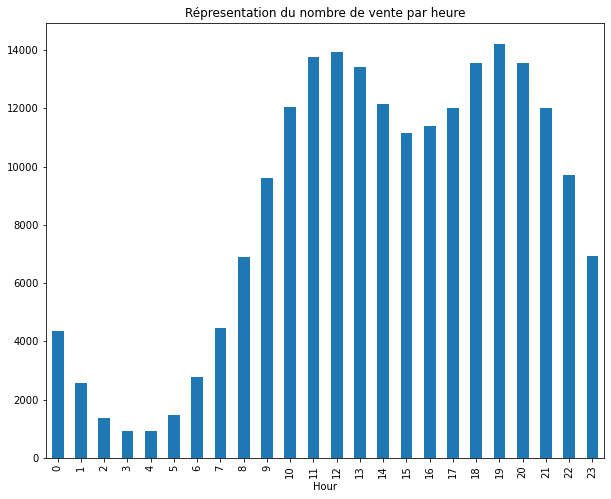

In [31]:
all_sales.groupby('Hour')["Quantity Ordered"].sum().plot.bar(figsize = (10, 8))
plt.title("Répresentation du nombre de vente par heure")

D'après le graphe, les meilleurs ventes s'effectue dans les intervalles[10, 12] et [17, 19]
    
Pour augmenter davantage les ventes, les publicités doivent être passées une heure à 09h-10h puis 17h-18h

In [ ]:
# Autre represéntation

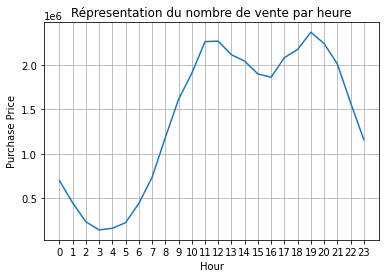

In [32]:

sale_by_hour = all_sales.groupby('Hour')["Purchase Price"].sum()
sns.lineplot(data=sale_by_hour, x="Hour", y=sale_by_hour)
plt.xticks(ticks = range(0,24))
plt.grid()
plt.title("Répresentation du nombre de vente par heure")
plt.show()

#### Quels sont les produits qui sont souvent achetés ensemble ?

Les produits achétés ensembles sont des produits qui ont le même numéro de commande

In [34]:
#Grouper les produits achetés ensemble les commandes

all_sales[all_sales["Order ID"].duplicated(keep = False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Purchase Price,City,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,11.95,Los Angeles,19
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",April,5.98,San Francisco,17
...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",September,3.84,Atlanta,20
11639,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,11.99,Atlanta,0
11640,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,5.98,Atlanta,0
11677,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",September,600.00,San Francisco,13


In [86]:
def concat_produit_by_order_id(produit:  list):
    return ";" .join(produit)

In [39]:
#On compte l'occurrence des couples de produits achetés ensemble



In [87]:
# R

df_copy = all_sales[all_sales["Order ID"].duplicated(keep = False)].copy()

In [42]:
df_copy

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Purchase Price,City,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,11.95,Los Angeles,19
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",April,5.98,San Francisco,17
...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",September,3.84,Atlanta,20
11639,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,11.99,Atlanta,0
11640,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,5.98,Atlanta,0
11677,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",September,600.00,San Francisco,13


In [88]:
#Récuperer les noms des produits vendu ensemble sous forme de chaine de caractère

group_product = df_copy.groupby('Order ID')["Product"].apply(concat_produit_by_order_id)
group_product

Order ID
141275              USB-C Charging Cable;Wired Headphones
141290     Apple Airpods Headphones;AA Batteries (4-pack)
141365                   Vareebadd Phone;Wired Headphones
141384                  Google Phone;USB-C Charging Cable
141450            Google Phone;Bose SoundSport Headphones
                               ...                       
319536                Macbook Pro Laptop;Wired Headphones
319556                      Google Phone;Wired Headphones
319584                            iPhone;Wired Headphones
319596                    iPhone;Lightning Charging Cable
319631    34in Ultrawide Monitor;Lightning Charging Cable
Name: Product, Length: 6674, dtype: object

In [89]:
from itertools import combinations #créer des couples uniques de données
from collections import Counter  #compte le nombre d'occurrence dans une liste

In [90]:

number_occurence = Counter()

In [91]:
group_product.to_list()

['USB-C Charging Cable;Wired Headphones',
 'Apple Airpods Headphones;AA Batteries (4-pack)',
 'Vareebadd Phone;Wired Headphones',
 'Google Phone;USB-C Charging Cable',
 'Google Phone;Bose SoundSport Headphones',
 'iPhone;Apple Airpods Headphones',
 'Google Phone;Apple Airpods Headphones',
 'iPhone;Apple Airpods Headphones;Wired Headphones',
 'USB-C Charging Cable;Apple Airpods Headphones',
 'Lightning Charging Cable;Wired Headphones',
 'iPhone;Lightning Charging Cable',
 '27in FHD Monitor;Bose SoundSport Headphones',
 'Google Phone;USB-C Charging Cable',
 'iPhone;Wired Headphones',
 'Google Phone;USB-C Charging Cable',
 'AA Batteries (4-pack);AAA Batteries (4-pack)',
 'Vareebadd Phone;USB-C Charging Cable;Wired Headphones',
 'Google Phone;USB-C Charging Cable',
 'Vareebadd Phone;Wired Headphones',
 '34in Ultrawide Monitor;Lightning Charging Cable',
 'USB-C Charging Cable;Wired Headphones',
 'Lightning Charging Cable;Bose SoundSport Headphones',
 'Google Phone;Wired Headphones',
 'iPhon

In [92]:
for element in group_product.to_list():
    product = element.split(";") #Transforme en une liste les éléments séparés par les points virgules
    
    #print(product)
    
    number_occurence .update(Counter(combinations(product,2)))
    

In [42]:
number_occurence 

Counter({('USB-C Charging Cable', 'Wired Headphones'): 155,
         ('Apple Airpods Headphones', 'AA Batteries (4-pack)'): 29,
         ('Vareebadd Phone', 'Wired Headphones'): 141,
         ('Google Phone', 'USB-C Charging Cable'): 953,
         ('Google Phone', 'Bose SoundSport Headphones'): 219,
         ('iPhone', 'Apple Airpods Headphones'): 343,
         ('Google Phone', 'Apple Airpods Headphones'): 7,
         ('iPhone', 'Wired Headphones'): 437,
         ('Apple Airpods Headphones', 'Wired Headphones'): 69,
         ('USB-C Charging Cable', 'Apple Airpods Headphones'): 34,
         ('Lightning Charging Cable', 'Wired Headphones'): 92,
         ('iPhone', 'Lightning Charging Cable'): 971,
         ('27in FHD Monitor', 'Bose SoundSport Headphones'): 12,
         ('AA Batteries (4-pack)', 'AAA Batteries (4-pack)'): 47,
         ('Vareebadd Phone', 'USB-C Charging Cable'): 348,
         ('34in Ultrawide Monitor', 'Lightning Charging Cable'): 17,
         ('Lightning Charging Cable

In [93]:
number_occurence.most_common(1)  #Renvoit la valeur qui a le nombre d'occurence la plus grande

[(('iPhone', 'Lightning Charging Cable'), 971)]

###  Quel produit a-t-on le plus vendu et pourquoi ?

In [45]:
all_sales.groupby('Product')["Quantity Ordered"].sum().sort_values(ascending= False)

Product
AAA Batteries (4-pack)        30457
AA Batteries (4-pack)         27128
USB-C Charging Cable          23512
Lightning Charging Cable      22794
Wired Headphones              20168
Apple Airpods Headphones      15360
Bose SoundSport Headphones    13209
27in FHD Monitor               7420
iPhone                         6730
27in 4K Gaming Monitor         6129
34in Ultrawide Monitor         6069
Google Phone                   5437
Flatscreen TV                  4718
Macbook Pro Laptop             4643
20in Monitor                   4055
ThinkPad Laptop                4052
Vareebadd Phone                2023
LG Washing Machine              649
LG Dryer                        640
Name: Quantity Ordered, dtype: int32

Text(0.5, 1.0, 'Répresentation de la quantité des produits')

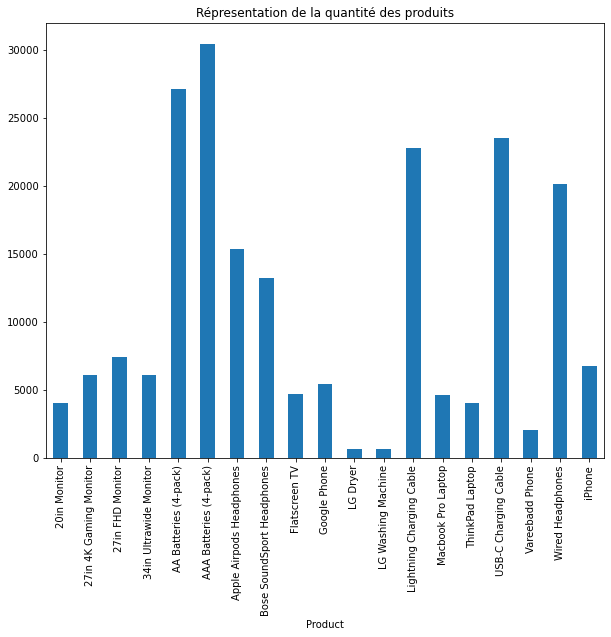

In [46]:
all_sales.groupby('Product')["Quantity Ordered"].sum().plot.bar(figsize = (10, 8))
plt.title("Répresentation de la quantité des produits")

AAA Batteries (4-pack)  est plus vendu car il sert d'alimentation pour beaucoup d'appareil. Et C'est une ressource épuisable qu'il faudrait acheter régulièrement.